<a href="https://colab.research.google.com/github/NishVish/Price-Prediction-Boston-Home-Price-/blob/main/Price_Prediction_(Boston_Home_Price).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The full names of the columns in the Boston dataset are as follows:

CRIM: Per capita crime rate by town.

ZN: Proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS: Proportion of non-retail business acres per town.

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

NOX: Nitric oxides concentration (parts per 10 million).

RM: Average number of rooms per dwelling.

AGE: Proportion of owner-occupied units built prior to 1940.

DIS: Weighted distances to five Boston employment centers.

RAD: Index of accessibility to radial highways.

TAX: Full-value property tax rate per $10,000.

PTRATIO: Pupil-teacher ratio by town.

B: 1000(Bk - 0.63)^2 where Bk is the proportion of Black people by town.

LSTAT: % lower status of the population.

MEDV: Median value of owner-occupied homes in $1000s.

In [2]:
from sklearn.datasets import fetch_openml

# Load the Boston Housing dataset from OpenML
boston_dataset = fetch_openml(name='boston', version=1)


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import pandas as pd

df = pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [5]:
df['MEDV'] = boston_dataset.target
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [6]:
df.shape

(506, 14)

In [7]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


In [9]:
df['CHAS'] = df['CHAS'].astype(int)
df['RAD'] = df['CHAS'].astype(int)

In [10]:
df[[ 'CHAS', 'RM', 'AGE', 'RAD', 'MEDV' ]]. head().describe()

,CHAS,RM,AGE,RAD,MEDV
count,5.0,5.000000,5.000000,5.0,5.000000
mean,0.0,6.865200,61.040000,0.0,29.980000
std,0.0,0.346716,12.402943,0.0,6.682963
min,0.0,6.421000,45.800000,0.0,21.600000
25%,0.0,6.575000,54.200000,0.0,24.000000
50%,0.0,6.998000,61.100000,0.0,33.400000
75%,0.0,7.147000,65.200000,0.0,34.700000
max,0.0,7.185000,78.900000,0.0,36.200000


In [11]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,0.069170,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,0.253994,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,0.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,0.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,0.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,0.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,1.000000,711.000000,22.000000,396.900000,37.970000,50.000000


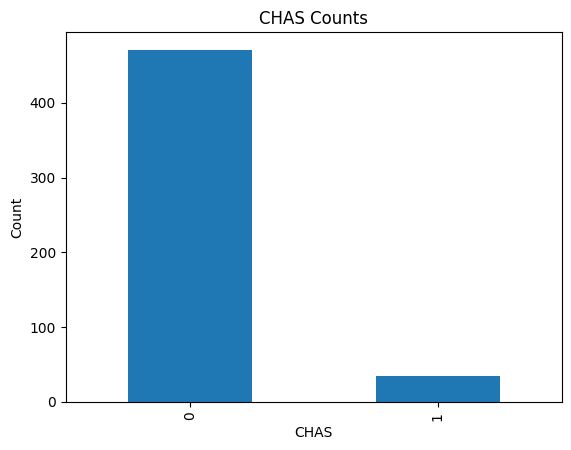

In [12]:
df['CHAS'].value_counts().plot(kind='bar')

# Set the plot title and labels
plt.title('CHAS Counts')
plt.xlabel('CHAS')
plt.ylabel('Count')

# Show the bar plot
plt.show()

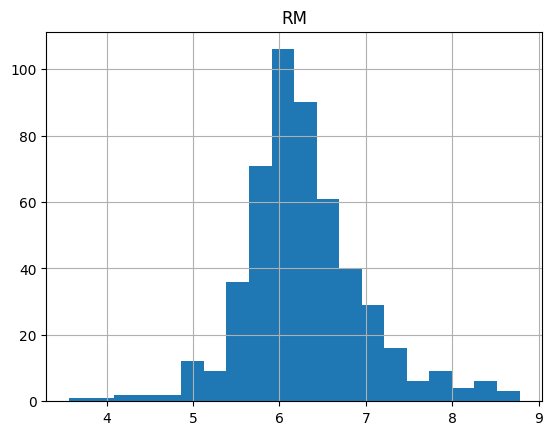

In [13]:
df.hist(column='RM', bins=20)
plt.savefig("plot1.png")
plt.show()

# Feature Seletion

Find Best Independent Variable that are able to predict House Price(Target Variable) with Most accuraccy

In [14]:
corr_matrix = df.corr().round(2)

In [15]:
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,-0.06,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.04,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.06,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,1.00,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.09,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,0.09,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.09,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.10,-0.53,-0.23,0.29,-0.50,0.25
RAD,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,1.00,-0.04,-0.12,0.05,-0.05,0.18
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,-0.04,1.00,0.46,-0.44,0.54,-0.47


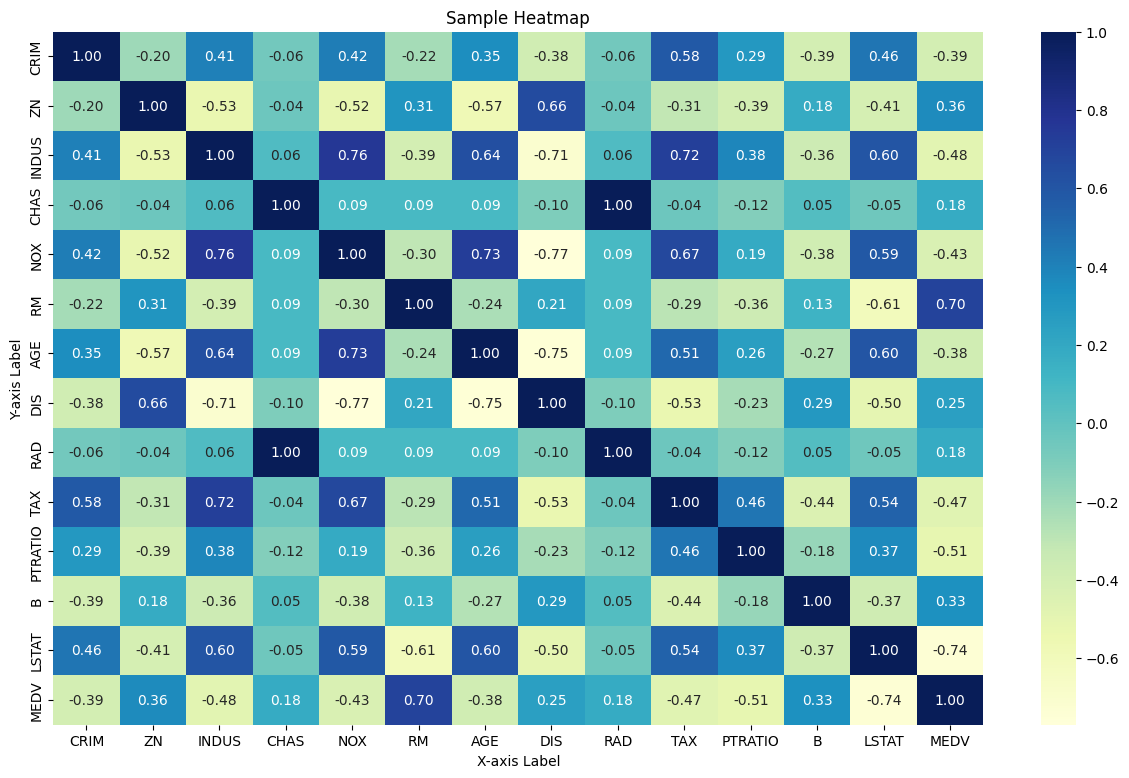

In [20]:
plt.figure(figsize=(15, 9))  # Adjust the figure size if needed
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt='.2f')

# Set labels for x and y axis
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')

# Set the title of the heatmap
plt.title('Sample Heatmap')

# Show the heatmap
plt.show()

We Chooose these Independent Variable to Train our Model

LSTAT :- -0.74

PTRATIO :- -0.51

RM :- 0.70

In [22]:
lis = ['LSTAT','PTRATIO','RM']

In [25]:
df.MEDV

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

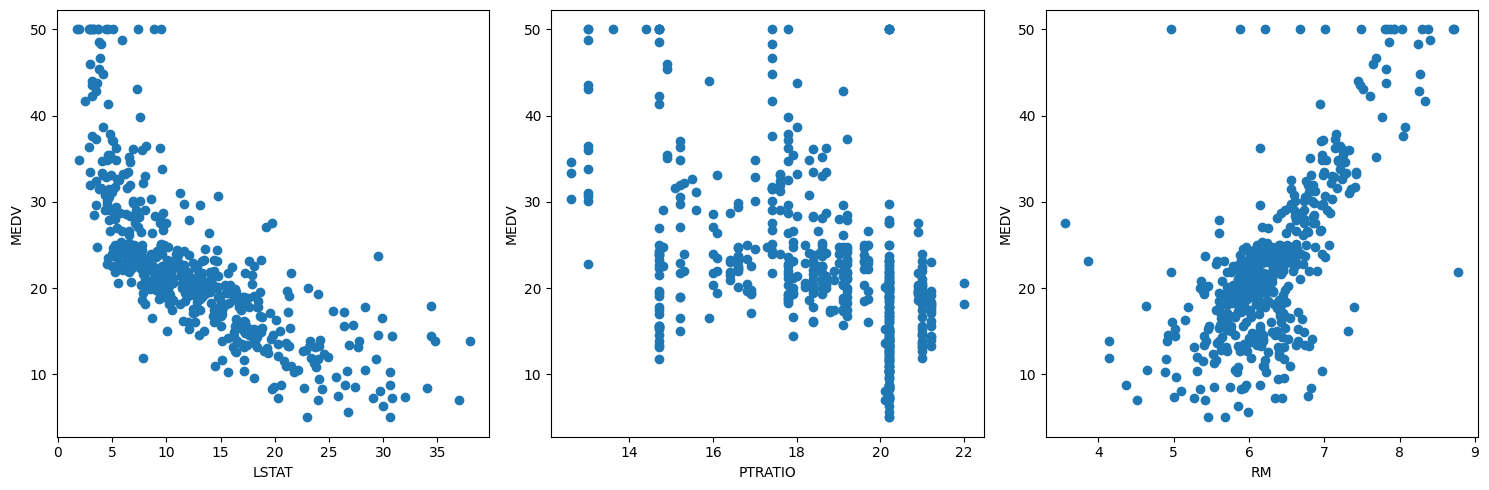

In [26]:
import matplotlib.pyplot as plt

lis = ['LSTAT', 'PTRATIO', 'RM']

fig, axes = plt.subplots(nrows=1, ncols=len(lis), figsize=(15, 5))

for i, x in enumerate(lis):
    axes[i].scatter(df[x], df['MEDV'])
    axes[i].set_xlabel(x)
    axes[i].set_ylabel('MEDV')

plt.tight_layout()
plt.show()


Instantiting the Model

In [28]:
from sklearn.linear_model import LinearRegression

In [49]:
m1 = LinearRegression()

In [50]:
X1 = df[['RM']]
Y1 = df['MEDV']

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X1,Y1,test_size = 0.3,random_state = 1)

In [56]:

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(354, 1)
(354,)
(152, 1)
(152,)


In [57]:
m1.fit(X_train,Y_train)

LinearRegression()

In [58]:
print(m1.intercept_.round(2))

-30.57


In [59]:
m1.coef_.round(2)

array([8.46])

In [74]:
predict1 = m1.predict(X_test)

Evaluating the Model

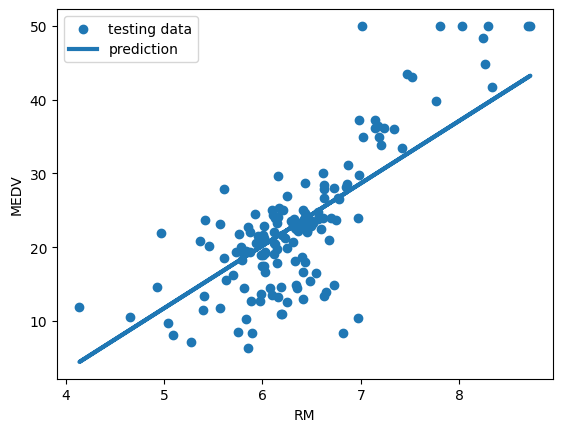

In [75]:
plt.scatter(X_test, Y_test,
label='testing data');
plt.plot(X_test, predict1,
label='prediction', linewidth=3)
plt.xlabel('RM'); plt.ylabel('MEDV')
plt.legend(loc='upper left')
plt.savefig("plot.png")
plt.show()

In [85]:
residual1 = Y_test -prediction1


In [82]:
print(prediction1 - Y_test)

307   -0.821016
343    2.184437
47     3.849350
67    -2.836736
362   -6.002659
         ...   
467    1.120901
95    -2.916300
122   -0.634465
260   -3.425789
23     4.113293
Name: MEDV, Length: 152, dtype: float64


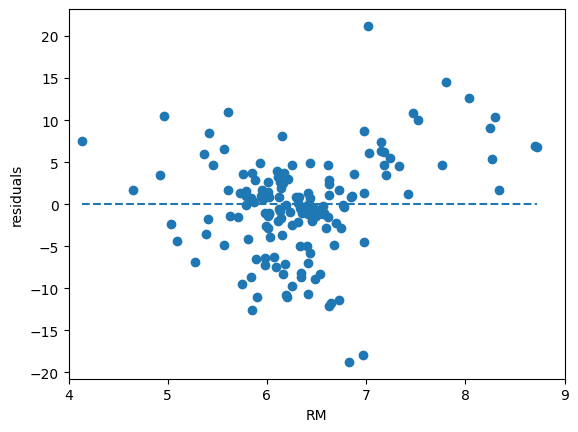

In [86]:
plt.scatter(X_test,residual1)
plt.hlines(y=0,xmin = X_test.min(),xmax = X_test.max(),linestyle='--')
# set xlim
plt.xlim((4, 9))
plt.xlabel('RM'); plt.ylabel('residuals')
plt.show()

Mean Squared Error

In [87]:
residual1.mean()

-0.2364508776638886

In [89]:
(residual1**2).mean()

36.517214730838624

R Squared

In [93]:
m1.score(X_test,Y_test)

0.6015774471545622